# Unsupervised Learning - Clustering
### Task: To predict the optimal number of clusters and represent it visually.

### Importing Libraries

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Creating the DataFrame

In [2]:
df = pd.read_csv('./Iris.csv')
df.head()
#Drop ID tag since it would hinder our results
df = df.drop(['Id'],1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Creating the training data

In [3]:
#Iris-versicolor=0, Iris-setosa=1, Iris-virginica=2
d = {"Iris-versicolor":0,"Iris-setosa":1,"Iris-virginica":2}
df['Species'].replace(d,inplace = True)
X = np.array(df.iloc[:,:-1])
y = np.array(df.iloc[:,-1])
print(f"X: {X[0]}, y: {y[0]}")

X: [5.1 3.5 1.4 0.2], y: 1


### Plotting

<Figure size 576x576 with 0 Axes>

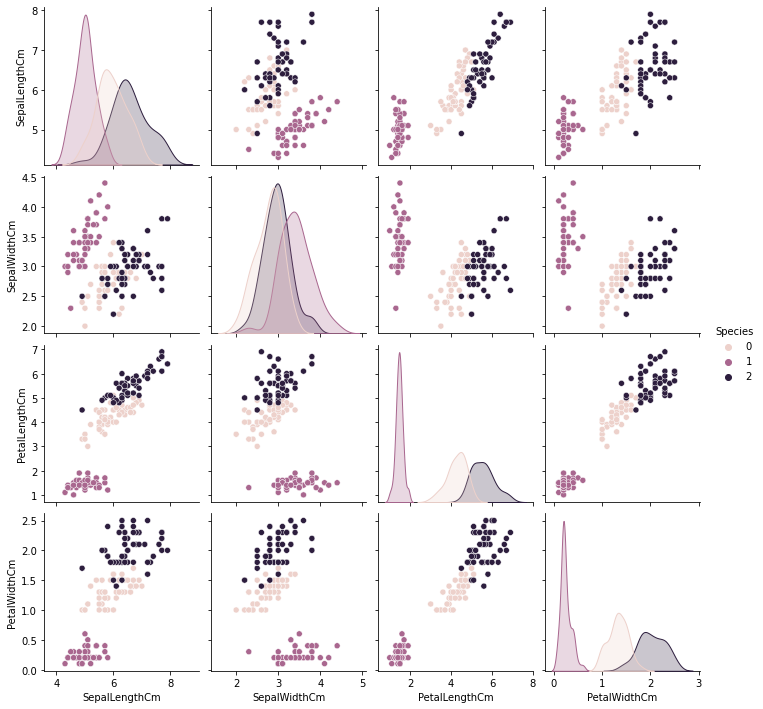

In [4]:
plt.figure(figsize=(8, 8))
ax = sns.pairplot(df, hue='Species')
plt.show()

### Predicting the number of clusters required

This is done using the elbow method. It allows us to pick the optimum number of clusters for classification (in the following case, it comes out to be 3)

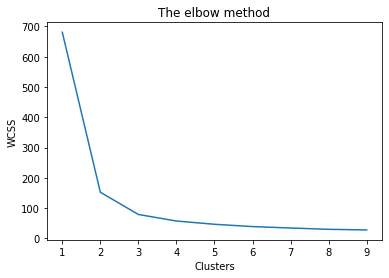

In [5]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init = 'k-means++', max_iter = 300, n_init = 10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10),wcss)
plt.title('The elbow method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

The optimum clusters is where the 'elbow' occurs (3).
As we can see, the WCSS(Within cluster sum of squares) does not decrease significantly with every iteration post 3

### Applying K-Means Clustering

In [6]:
# Creating the Classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

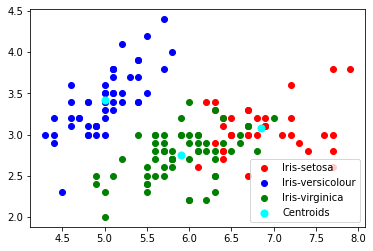

In [9]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'cyan', label = 'Centroids')

plt.legend()

Thus, we have successfully predicted the accurate number of clusters required for the particular dataset